# Task 1: Reduction to Hessenberg

Recall that in precept 4, we wrote the code for QR decomposition by Housholder using the 
following algorithm (10.1 in the book): 
![gs1](QR.png)

And the algorithm to form Q given the householder reflectors (10.3 the book):
![gs1](Q_times_b.png)


The code from precept 4 is copy pasted for you below

In [1]:
## YOU WANT TO ADAPT THIS FOR REDUCTION TO UPPER HESSENBERG

import numpy as np

# Implements algorithm 10.1
def householder_triangularization(A):
    _,n = A.shape
    R = np.copy(A) # Store temporary vectors into R.
    V = [] # Store v's into this list
    for k in range(n):
        # Column k, entries on and below the diagonal
        x = R[k:,k] 
        # v = sign(x[0]) e_1 \|x\| + x
        v = x.copy() 
        v[0] += np.sign(v[0]) * np.linalg.norm(x)
        # Normalize:
        v = v / np.linalg.norm(v)
        # Update (2,2) block of matrix:
        R[k:,k:] = R[k:,k:] - 2 * np.outer(v,  v.T @ R[k:,k:])

        # Store v in V:
        V.append(v)
    
    return V, R

# Implements algorithm 10.3
def apply_Q_to_vector(V, x):
    # Computes b = Q @ x, where Q is defined implicitely by the Householder reflectors in V
    n = len(V)
    b = x.copy()
    for k in reversed(range(n)):
        b[k:] = b[k:] - 2 * V[k] * (V[k].T @ b[k:])
    return b


# Uses algorithm 10.3 to compute Q, by doing Q= Q@I, column by column
def form_Q_matrix(V):
    m = V[0].size
    I = np.eye(m)
    Q = np.zeros((m,m))
    for k in range(m):
        Q[:,k] = apply_Q_to_vector(V,I[:,k])
    return Q


Adapt this code to compute a reduction to upper Hessenberg, using the algorithm below:

![gs1](hessenberg.png)

IndexError: list index out of range

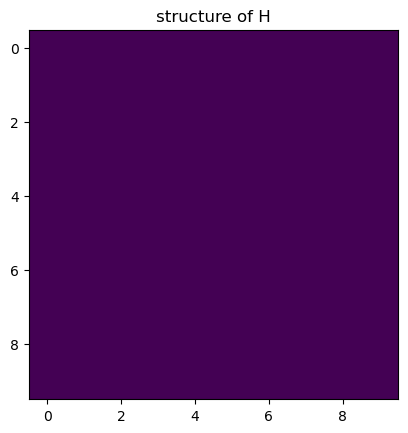

In [2]:
# REDUCTION TO UPPER HESSENBERG
import numpy as np
def householder_hessenberg(A):
    _,n = A.shape
    H = np.copy(A) # Store temporary vectors into Q.
    V = [] # Store v's into this list
    ## Add your code here

    return V, H



## THIS CODE IS WRITTE FOR YOU. NO NEED TO CHANGE IT
def hessenberg_apply_Q_to_vector(V, x):
    # Computes b = Q @ x, where Q is defined implicitely by the Householder reflectors in V
    n = x.size
    b = x.copy()
    v_counter = n-3
    for k in reversed(range(n-2)):
        b[k+1:] = b[k+1:] - 2 * V[v_counter] * (V[v_counter].T @ b[k+1:])
        v_counter -=1
    return b

def hessenberg_form_Q_matrix(V):
    m = V[0].size + 1
    I = np.eye(m)
    Q = np.zeros((m,m))
    for k in range(m):
        Q[:,k] = hessenberg_apply_Q_to_vector(V,I[:,k])
    return Q

n = 10
A = np.random.randn(n,n)

V, H = householder_hessenberg(A)
import matplotlib.pyplot as plt
plt.imshow(np.abs(H) > 1e-14)
plt.title('structure of H')

Q = hessenberg_form_Q_matrix(V)
# Recompose A using its decomposition
A_recomp = Q@H@Q.T
# Error, should be ~1e-16
print('error: ', np.linalg.norm(A_recomp - A)/ np.linalg.norm(A))

# Task 2: Polynomials rootfinding by eigensolver
Recall the companion matrix of the polynomial:
$$
p(z) = z^m + a_{m-1} z^{m-1} + a_{m-2} z^{m-2} + \cdots a_1 z + a_0
$$
is:
<figure>
<p align="center">
<img src="companion.png" height="280">
<p>
</figure>
Given a polynomial, form its companion matrix and find the roots of the polynomial using the funciton `np.linalg.linalg.eigvals(A)` which computes the eigenvalue decomposition.

Try it for $m =5,50$ and $500$. What do you notice?

In [3]:
def rootfinding_by_eigenalue_decomposition(coeffs):
    ## ADD YOUR CODE HERE
    return np.zeros(coeffs.size + 1)

## this code is written for you. no need to change it.

# very naive function to evaluate a monic polynomial at z
def eval_p(z, coeffs):
    val = 0
    for k in range(coeffs.size):
        val += coeffs[k] * (z**k)
    val += z**(k+1)
    return val


m = 5
coeffs = np.random.randn(m)
roots = rootfinding_by_eigenalue_decomposition(coeffs)

for root in roots:
    # They all should be close to 0, ~1e-14 is fine
    print('p(lambda) = ', np.abs(eval_p(root, coeffs)))



p(lambda) =  2.2017857622558563
p(lambda) =  2.2017857622558563
p(lambda) =  2.2017857622558563
p(lambda) =  2.2017857622558563
p(lambda) =  2.2017857622558563
p(lambda) =  2.2017857622558563
